In [0]:
import pandas as pd
import numpy as np
import json
import csv
import requests
from collections import Counter
import nltk
import pandas as pd
import re as regex
from time import time
import gensim
from wordcloud import WordCloud
import matplotlib.pyplot as plt




In [2]:
#NLTK
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
!pip install ekphrasis


     |████████████████████████████████| 81kB 2.7MB/s 
     |████████████████████████████████| 184kB 10.2MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
  Created wheel for ekphrasis: filename=ekphrasis-0.5.1-cp36-none-any.whl size=82843 sha256=946e24fd384e57491d013f056da7f902c5f1dfb01f6664dd8772fcefea6633cc
  Stored in directory: /root/.cache/pip/wheels/2f/c5/9b/c9b60f535a2cf9fdbc92d84c4801a010c35a9cd348011ed2a1
  Created wheel for ftfy: filename=ftfy-5.7-cp36-none-any.whl size=44593 sha256=b6e5474e2f16d8d8f2e79b2875349a386bdf11be7a677ebedcf5fe1b47be10c7
  Stored in directory: /root/.cache/pip/wheels/8e/da/59/6c8925d571aacade638a0f515960c21c0887af1bfe31908fbf
Successfully built ekphrasis ftfy


In [0]:
#Path to list of governors
dem_url = 'https://raw.githubusercontent.com/anushapatil5/COVID-TwitterDiscourse/master/Dataset/governorList/final_democrat.csv?token=AIWHHBLHE3QSFUASSEKSEAC6UM5KK'
dem_df = pd.read_csv(dem_url)
rep_url = 'https://raw.githubusercontent.com/anushapatil5/COVID-TwitterDiscourse/master/Dataset/governorList/final_republican.csv?token=AIWHHBNJBH5VFV75N3IULQS6UM5MC'
#('/COVID-TwitterDiscourse/Dataset/governorList/final_democrat.csv')
rep_df = pd.read_csv(rep_url)



In [0]:
tweets_csv_url = 'https://raw.githubusercontent.com/anushapatil5/COVID-TwitterDiscourse/master/Dataset/tweets/tweet-stats.csv?token=AIWHHBPVNWAG2WIWS3RWLDC6UM3SO'
tweets_csv = pd.read_csv(tweets_csv_url)

In [16]:
tweets_csv['tweet_count'].sum()

28033

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/ML-Project/COVID-TwitterDiscourse

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/ML-Project/COVID-TwitterDiscourse


In [12]:
! git clone https://github.com/anushapatil5/COVID-TwitterDiscourse.git

Cloning into 'COVID-TwitterDiscourse'...
fatal: could not read Username for 'https://github.com': No such device or address


In [0]:
#Path to the Governer's tweets
directory_path_democrat_personal = "/content/gdrive/My Drive/ML-Project/COVID-TwitterDiscourse/Dataset/tweets/democrat/personal/"
directory_path_democrat_official = "/content/gdrive/My Drive/ML-Project/COVID-TwitterDiscourse/Dataset/tweets/democrat/official/"

directory_path_republican_personal = "/content/gdrive/My Drive/ML-Project/COVID-TwitterDiscourse/Dataset/tweets/republican/personal/"
directory_path_republican_official = "/content/gdrive/My Drive/ML-Project/COVID-TwitterDiscourse/Dataset/tweets/republican/official/"

file_path_dem = []
file_path_republican = []

#Adding all the file names
for ind in dem_df.index: 
    file_path_dem.append(directory_path_democrat_personal + str(ind) + ".json")
    file_path_dem.append(directory_path_democrat_official + str(ind) + ".json")

for ind in rep_df.index: 
    file_path_republican.append(directory_path_republican_personal + str(ind) + ".json")
    file_path_republican.append(directory_path_republican_official + str(ind) + ".json")



    

In [0]:
#Loading all the JSON files

dem_tweets_file=[]
rep_tweets_file = []
for ind in range(len(file_path_dem)): 
  with open(file_path_dem[ind]) as f:
    dem_tweets_file.append(json.load(f))

rep_tweets_file=[]
for ind in range(len(file_path_republican)): 
  with open(file_path_republican[ind]) as f1:
    rep_tweets_file.append(json.load(f1))

In [0]:
#Converting the JSON files to Data Frames

dem_tweets = pd.DataFrame()
for ind in range(len(dem_tweets_file)): 
  dem_tweets = dem_tweets.append(pd.json_normalize(dem_tweets_file[ind]))
  dem_tweets['Party'] = 'Democrat'

rep_tweets = pd.DataFrame()
for ind in range(len(rep_tweets_file)): 
  rep_tweets = rep_tweets.append(pd.json_normalize(rep_tweets_file[ind]))
  rep_tweets['Party'] = 'Republican'

In [0]:
#Merging Democrats and Republicans DataFrames

tweets = dem_tweets.append(rep_tweets)
tweets.reset_index(inplace=True, drop=True)

In [0]:
tweets['hashtag'] = tweets['tweet_text'].apply(lambda x: re.findall(r"#(\w+)", x))


In [22]:
tweets

,tweet_text,timestamp,id,user,Party,hashtag
0,RT @CBSThisMorning: ONLY ON @CBSThisMorning: @...,2020-04-20 22:56:40,1.252371e+18,GavinNewsom,Democrat,[coronaviru]
1,"- 70,000+ laptops, iPads, and more.\n- $30M fo...",2020-04-20 21:06:28,1.252343e+18,GavinNewsom,Democrat,[]
2,"NEW: CA has 30,978 confirmed positive cases of...",2020-04-20 19:19:21,1.252316e+18,GavinNewsom,Democrat,[COVID19]
3,.@JenSiebelNewsom and I are giving an update o...,2020-04-20 19:02:10,1.252312e+18,GavinNewsom,Democrat,[COVID19]
4,TUNE IN NOW for a #COVID19 update. https://t.c...,2020-04-20 18:58:38,1.252311e+18,GavinNewsom,Democrat,[COVID19]
...,...,...,...,...,...,...
29205,"I'll be hosting listening sessions in Rawlins,...",2020-01-28 17:00:34,1.222203e+18,GovernorGordon,Republican,[]
29206,Today is International Holocaust Remembrance D...,2020-01-27 15:58:36,1.221825e+18,GovernorGordon,Republican,[]
29207,Great to meet barrel racer extraordinaire @Ped...,2020-01-26 04:18:46,1.221286e+18,GovernorGordon,Republican,[]
29208,Thanks to Pine Bluffs Elementary School for ho...,2020-01-22 17:14:56,1.220032e+18,GovernorGordon,Republican,[]


In [0]:
#Data Preprocessing 
from ekphrasis.classes.spellcorrect import SpellCorrector
from textblob import TextBlob


def preprocess_data(data):

  #Removes Numbers
  data = data.str.replace('\d+', '')

  #Removes URLs
  data = data.str.replace('http\S+|www.\S+', '', case=False)  
  lower_text = data.str.lower()
  lemmatizer = nltk.stem.WordNetLemmatizer()
  w_tokenizer =  TweetTokenizer()

  def lemmatize_text(text): 
    return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]

  def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', (word))
        if new_word != '':
            new_words.append(new_word)
    return new_words
  

  words = lower_text.apply(lemmatize_text)
  words = words.apply(remove_punctuation)

  return pd.DataFrame(words)

In [0]:
pre_tweets = preprocess_data(tweets['tweet_text'])
tweets['tweet_text'] = pre_tweets['tweet_text']

In [0]:
#Removing Stop Words

stop_words = set(stopwords.words('english'))
tweets['tweet_text'] = tweets['tweet_text'].apply(lambda x: [item for item in x if item not in stop_words])


In [26]:
tweets

,tweet_text,timestamp,id,user,Party,hashtag
0,"[rt, cbsthismorning, cbsthismorning, cagoverno...",2020-04-20 22:56:40,1.252371e+18,GavinNewsom,Democrat,[coronaviru]
1,"[laptop, ipads, hot, spot, connectivity, help,...",2020-04-20 21:06:28,1.252343e+18,GavinNewsom,Democrat,[]
2,"[new, ca, ha, confirmed, positive, case, covid...",2020-04-20 19:19:21,1.252316e+18,GavinNewsom,Democrat,[COVID19]
3,"[jensiebelnewsom, giving, update, covid, morni...",2020-04-20 19:02:10,1.252312e+18,GavinNewsom,Democrat,[COVID19]
4,"[tune, covid, update]",2020-04-20 18:58:38,1.252311e+18,GavinNewsom,Democrat,[COVID19]
...,...,...,...,...,...,...
29205,"[ill, hosting, listening, session, rawlins, pi...",2020-01-28 17:00:34,1.222203e+18,GovernorGordon,Republican,[]
29206,"[today, international, holocaust, remembrance,...",2020-01-27 15:58:36,1.221825e+18,GovernorGordon,Republican,[]
29207,"[great, meet, barrel, racer, extraordinaire, p...",2020-01-26 04:18:46,1.221286e+18,GovernorGordon,Republican,[]
29208,"[thanks, pine, bluff, elementary, school, host...",2020-01-22 17:14:56,1.220032e+18,GovernorGordon,Republican,[]


In [27]:
#Segmenting Hashtags into n words

from ekphrasis.classes.segmenter import Segmenter
# segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus="twitter")

a = []
for i in range(len(tweets)):
  if tweets['hashtag'][i] != a:
    listToStr1 = ' '.join([str(elem) for elem in tweets['hashtag'][i]])
    tweets.loc[i,'Segmented#'] = seg_tw.segment(listToStr1)


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt


In [28]:
tweets

,tweet_text,timestamp,id,user,Party,hashtag,Segmented#
0,"[rt, cbsthismorning, cbsthismorning, cagoverno...",2020-04-20 22:56:40,1.252371e+18,GavinNewsom,Democrat,[coronaviru],corona viru
1,"[laptop, ipads, hot, spot, connectivity, help,...",2020-04-20 21:06:28,1.252343e+18,GavinNewsom,Democrat,[],NaN
2,"[new, ca, ha, confirmed, positive, case, covid...",2020-04-20 19:19:21,1.252316e+18,GavinNewsom,Democrat,[COVID19],covid 19
3,"[jensiebelnewsom, giving, update, covid, morni...",2020-04-20 19:02:10,1.252312e+18,GavinNewsom,Democrat,[COVID19],covid 19
4,"[tune, covid, update]",2020-04-20 18:58:38,1.252311e+18,GavinNewsom,Democrat,[COVID19],covid 19
...,...,...,...,...,...,...,...
29205,"[ill, hosting, listening, session, rawlins, pi...",2020-01-28 17:00:34,1.222203e+18,GovernorGordon,Republican,[],NaN
29206,"[today, international, holocaust, remembrance,...",2020-01-27 15:58:36,1.221825e+18,GovernorGordon,Republican,[],NaN
29207,"[great, meet, barrel, racer, extraordinaire, p...",2020-01-26 04:18:46,1.221286e+18,GovernorGordon,Republican,[],NaN
29208,"[thanks, pine, bluff, elementary, school, host...",2020-01-22 17:14:56,1.220032e+18,GovernorGordon,Republican,[],NaN


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


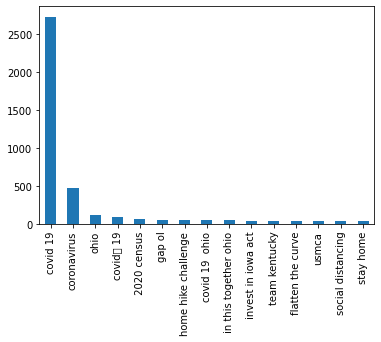

In [29]:
tweets['Segmented#'].value_counts()[:15].plot(kind = 'bar')

In [0]:
#Frequency of words
fdist = FreqDist(tweets['Segmented#'])


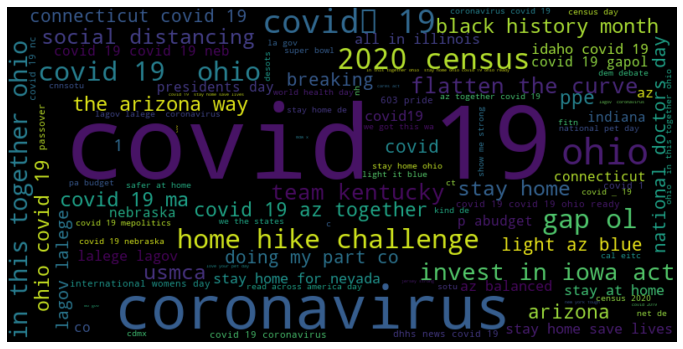

In [31]:
#WordCloud
wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(fdist)

plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
from ekphrasis.classes.spellcorrect import SpellCorrector
sp = SpellCorrector(corpus="twitter") 
for i in range(len(tweets['tweet_text'])):
  listToStr = ' '.join([str(elem) for elem in tweets['tweet_text'][i]])
  tweets.loc[i,'tweet_text_spell'] = sp.correct(listToStr)
  


Reading twitter - 1grams ...


KeyboardInterrupt: ignored

## Splitting Data

In [32]:
# 0.15 for val, 0.15 for test, 0.7 for train
val_size = int(tweets.shape[0] * 0.15)
test_size = int(tweets.shape[0] * 0.15)

# Shuffle the data
tweets = tweets.sample(frac=1)
# Split tweets df to test/val/train
test_df = tweets[:test_size]
val_df = tweets[test_size:test_size+val_size]
train_df = tweets[test_size+val_size:]


train_texts, train_labels = list(train_df.tweet_text), list(train_df.Party)
val_texts, val_labels     = list(val_df.tweet_text), list(val_df.Party)
test_texts, test_labels   = list(test_df.tweet_text), list(test_df.Party)


# Check that idces do not overlap
assert set(train_df.index).intersection(set(val_df.index)) == set({})
assert set(test_df.index).intersection(set(train_df.index)) == set({})
assert set(val_df.index).intersection(set(test_df.index)) == set({})
# Check that all idces are present
assert tweets.shape[0] == len(train_labels) + len(val_labels) + len(test_labels)

# Sizes
print(
    f"Size of initial data: {tweets.shape[0]}\n"
    f"Train size: {len(train_labels)}\n"
    f"Val size: {len(val_labels)}\n"
    f"Test size: {len(test_labels)}\n"
)

Size of initial data: 29210
Train size: 20448
Val size: 4381
Test size: 4381



## Vectorizer Method 1

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_vec = v.fit_transform(train_df['tweet_text'].apply(lambda x: np.str_(x)))
X_val_vec = v.fit_transform(val_df['tweet_text'].apply(lambda x: np.str_(x)))
X_test_vec = v.fit_transform(test_df['tweet_text'].apply(lambda x: np.str_(x)))

In [34]:
X_train_vec

<20448x20365 sparse matrix of type '<class 'numpy.int64'>'
	with 218563 stored elements in Compressed Sparse Row format>

In [35]:
print(X_train_vec)

  (0, 9886)	1
  (0, 19202)	1
  (0, 14614)	1
  (0, 10643)	1
  (0, 819)	1
  (0, 17577)	1
  (0, 806)	1
  (0, 18261)	1
  (0, 3693)	1
  (0, 13467)	1
  (0, 15954)	1
  (0, 10588)	1
  (0, 4314)	1
  (1, 16760)	1
  (1, 17999)	1
  (1, 1112)	1
  (1, 17972)	1
  (1, 13499)	1
  (2, 19039)	1
  (2, 13557)	1
  (2, 19723)	1
  (2, 20122)	1
  (2, 17205)	1
  (2, 3987)	1
  (2, 2751)	1
  :	:
  (20445, 17155)	1
  (20445, 3773)	1
  (20445, 8739)	1
  (20445, 4186)	1
  (20445, 7942)	1
  (20445, 14408)	1
  (20445, 4137)	1
  (20445, 15031)	1
  (20445, 18987)	1
  (20445, 12594)	1
  (20445, 9593)	1
  (20445, 9496)	1
  (20446, 17999)	1
  (20446, 17401)	1
  (20446, 10043)	1
  (20446, 16255)	1
  (20446, 17811)	1
  (20446, 1514)	1
  (20446, 14096)	1
  (20446, 16286)	1
  (20446, 19696)	1
  (20446, 16617)	1
  (20446, 10832)	1
  (20446, 15749)	1
  (20447, 17962)	1


## Vectorizer Method 2

In [36]:
#@title Download GloVe word embeddings

# === Download GloVe word embeddings
# !wget http://nlp.stanford.edu/data/glove.6B.zip

# === Unzip word embeddings and use only the top 50000 word embeddings for speed
# !unzip glove.6B.zip
# !head -n 50000 glove.6B.300d.txt > glove.6B.300d__50k.txt

# === Download Preprocessed version
!wget https://docs.google.com/uc?id=1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu -O glove_split.aa
!wget https://docs.google.com/uc?id=1LF2yD2jToXriyD-lsYA5hj03f7J3ZKaY -O glove_split.ab
!wget https://docs.google.com/uc?id=1N1xnxkRyM5Gar7sv4d41alyTL92Iip3f -O glove_split.ac
!cat glove_split.?? > 'glove.6B.300d__50k.txt'

--2020-04-24 19:25:21--  https://docs.google.com/uc?id=1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu
Resolving docs.google.com (docs.google.com)... 172.217.212.113, 172.217.212.138, 172.217.212.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dd5ahpulco3vcj3tej6mrkqp4m7jv52u/1587756300000/14514704803973256873/*/1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu [following]
--2020-04-24 19:25:26--  https://doc-0k-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dd5ahpulco3vcj3tej6mrkqp4m7jv52u/1587756300000/14514704803973256873/*/1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu
Resolving doc-0k-0g-docs.googleusercontent.com (doc-0k-0g-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c05::84
Connecting to doc-0k-0g-docs.googleusercontent.com (doc-0k-0g-docs.googleusercontent.com)|172.21

In [0]:
def load_glove(glove_path, embedding_dim):
    with open(glove_path) as f:
        token_ls = [PAD_TOKEN, UNK_TOKEN]
        embedding_ls = [np.zeros(embedding_dim), np.random.rand(embedding_dim)]
        for line in f:
            token, raw_embedding = line.split(maxsplit=1)
            token_ls.append(token)
            embedding = np.array([float(x) for x in raw_embedding.split()])
            embedding_ls.append(embedding)
        embeddings = np.array(embedding_ls)
    return token_ls, embeddings

PAD_TOKEN = '<PAD>'
UNK_TOKEN = '<UNK>'
EMBEDDING_DIM=300 # dimension of Glove embeddings
glove_path = "glove.6B.300d__50k.txt"
vocab, embeddings = load_glove(glove_path, EMBEDDING_DIM)

In [38]:
vocab_size = len(vocab)
vocab_size

50002

In [39]:
!pip install sacremoses

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import os
import pandas as pd
import sacremoses
from torch.utils.data import dataloader, Dataset
import tqdm

     |████████████████████████████████| 890kB 3.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=2ca0a3dbaee0bea24ddaa977f4ab46b53805a1e08c469fa20f79496ca7f130d5
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sacremoses


In [40]:
def featurize(data, labels, vocab, max_seq_length=256):
    vocab_to_idx = {word: i for i, word in enumerate(vocab)}
    text_data = []
    label_data = []
    for ex in tqdm.tqdm_notebook(data):
        ids = [vocab_to_idx.get(token, 1) for token in ex]
        text_data.append(ids)
    return text_data, labels
train_data_indices, train_labels = featurize(train_texts, train_labels, vocab)
val_data_indices, val_labels = featurize(val_texts, val_labels, vocab)
test_data_indices, test_labels = featurize(test_texts, test_labels, vocab)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [41]:
train_data_indices[:5]

[[1049, 16969, 7287, 118, 172, 2663, 2091, 375, 4237, 644, 166, 4155, 344],
 [1, 3126, 2621, 1, 17662],
 [1, 71, 1, 2774, 1, 19440, 3847, 236, 163, 454],
 [1852, 1, 5398, 3845, 369, 172, 149, 1],
 [6060, 1, 935, 2597, 1814, 1994, 841, 730, 4480]]

In [42]:
train_labels[:5]

['Democrat', 'Republican', 'Republican', 'Democrat', 'Republican']

## Using PyTorch Dataloader in case we implement LSTM:

In [0]:
import numpy as np
import torch
from torch.utils.data import Dataset

class SpamDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list, max_sent_length=128):
        """
        @param data_list: list of data tokens 
        @param target_list: list of data targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        self.max_sent_length = max_sent_length
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key, max_sent_length=None):
        """
        Triggered when you call dataset[i]
        """
        if max_sent_length is None:
            max_sent_length = self.max_sent_length
        token_idx = self.data_list[key][:max_sent_length]
        label = self.target_list[key]
        return [token_idx, label]

    def spam_collate_func(self,batch):
        """
        Customized function for DataLoader that dynamically pads the batch so that all 
        data have the same length
        spam_collate_func is supposed to dynamically pad or trim the sentences in the batch based on self.max_sent_length and the length of longest sequence in the batch.
        """ 
        data_text = [i[0] for i in batch]
        target = [i[1] for i in batch]

        data_list = [] # store padded sequences
        label_list = target
        lengths = []
        

        #max_batch_seq_len = None # the length of longest sequence in batch
                                 # if it is less than self.max_sent_length
                                 # else max_batch_seq_len = self.max_sent_length
        for data in data_text:
            lengths.append(len(data))

        if self.max_sent_length > max(lengths):
          max_batch_seq_len = self.max_sent_length
        else:
          max_batch_seq_len = max(lengths)

    

        for i, data in enumerate(data_text):
            if len(data) < max_batch_seq_len:
              data_list.append(data)
              data_list[i].extend([0] * (max_batch_seq_len - len(data)))
              #data_list.append(temp[i])
            
            elif len(data) > self.max_sent_length:
              data_list.append(data[:self.max_sent_length])
              #data_list[i].append(temp[i])
            
            elif len(data) == self.max_sent_length:
              data_list.append(data)
              #data_list[i].append(temp[i])

        

        return torch.as_tensor(data_list), torch.as_tensor(label_list)

BATCH_SIZE = 64
max_sent_length=256
train_dataset = SpamDataset(train_data_indices, train_labels, max_sent_length)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=train_dataset.spam_collate_func,
                                           shuffle=True)

val_dataset = SpamDataset(val_data_indices, val_labels, train_dataset.max_sent_length)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=train_dataset.spam_collate_func,
                                           shuffle=False)

test_dataset = SpamDataset(test_data_indices, test_labels, train_dataset.max_sent_length)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=train_dataset.spam_collate_func,
                                           shuffle=False)



In [47]:
data_batch, labels = next(iter(train_loader))
print("data batch dimension: ", data_batch.size())
print("data_batch: ", data_batch)
print("labels: ", labels)

ValueError: ignored